<a href="https://www.kaggle.com/code/polydeuces/sms-spam-detection-using-multinomial-naive-bayes?scriptVersionId=95136772" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


We have to import several libraries/modules first.
* pandas
* numpy
* matplotlib
* CountVectorizer
* train_test_split
* MultinomialNB

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

We import the data into pandas DataFrame and check top 5 results.

In [3]:
df = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv', encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


As we can clearly see, we have some columns we don't need. Let's get rid of them.

In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1)

As 'v1 and 'v2' is not telling us much, we rename them to more user friendly labels: 'class' and 'message', respectively. Next we check the results by using *head()* again.

In [5]:
df.rename(columns={'v1':'class', 'v2':'message'}, inplace=True)
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's do some more clean-up.

In [6]:
df.isnull().sum()

class      0
message    0
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


We had no empty cells, but we had some duplicates. We got rid of them using *drop_duplicates()* method.

Now we will visualize our data with bar and pie type plots. As we work only on text, we need to give plots some numbers to work with.

In [9]:
plot_data = df.groupby('class')['message'].nunique()

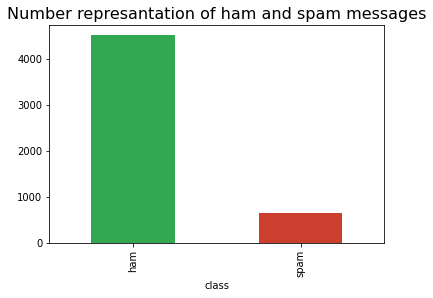

In [10]:
plot_data.plot(kind='bar', color=['#32a852', '#cc3f2f'])
plt.title('Number represantation of ham and spam messages', fontsize=16)
plt.show()

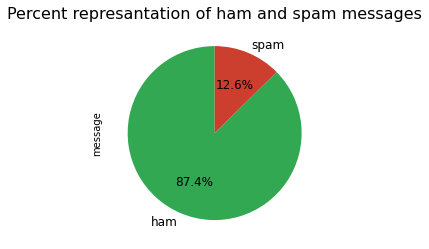

In [11]:
plot_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, fontsize=12, colors=['#32a852', '#cc3f2f'])
plt.title('Percent represantation of ham and spam messages', fontsize=16)
plt.show()

Now let's get down to creating a model. We will use [sci-kit flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to choose the right estimator for us.
Step by step:
* We have more than 50 samples (5571 samples)
* We are predicting a category (spam or ham)
* We have labeled data (as spam or ham)
* We have less than 100k samples (5571 samples)
* We work with text data

By that logic, the best one for us is classification estimator, Naive Bayes. For this job, we will use Multinomial Naive Bayes, as it seems to work best for text data.

First, we import data from our columns to array variables.

In [12]:
x = np.array(df['message'])
y = np.array(df['class'])

We tokenize them using *CountVectorizer()*, then fit and transform.

In [13]:
cv = CountVectorizer()
X = cv.fit_transform(x)

Now we split our arrays into training and testing data.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=33)

We create and train our model.

In [15]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

We can now test our model. Using some custom made samples, we let our model predict if they are 'ham' or 'spam'.

In [16]:
sample = ['Hey, you still owe me $100 dollars. When can I get them back?',
          'Congrats, you won $1000!',
          'Ayo Mr. White, pizza\'s here',
          'Your Internet is slow? Try our new package - over 100Mbs, now only for $10.99 per month!'
          ]
data = cv.transform(sample).toarray()
print(clf.predict(data))

['ham' 'spam' 'ham' 'spam']
